In [3]:
!apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 0s (1,962 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [35]:
!pip install PyMuPDF easyocr Pillow numpy

In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import easyocr
import numpy as np

def pdf_to_text(pdf_path):
    # Конвертировать PDF в изображения
    images = convert_from_path(pdf_path)

    reader = easyocr.Reader(['ru'], gpu=True)
    total_text = []

    # Обработать каждое изображение
    for img in images:
        # Преобразовать PIL.Image в формат, который понимает easyocr
        img_array = np.array(img)
        # Распознать текст на текущей странице
        results = reader.readtext(img_array)

        # Собрать текст из всех найденных блоков
        page_text = ' '.join([result[1] for result in results])
        total_text.append(page_text)

    return '\n'.join(total_text)

In [ ]:
# Использование
result = pdf_to_text('/content/64497298726756.pdf')

# Сохранить результат в файл
with open('output.txt', 'w', encoding='utf-8') as f:
    f.write(result)

print("Результат сохранен в файл output.txt")

Результат сохранен в файл output.txt


In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import easyocr
import numpy as np
import pandas as pd
import re

def pdf_to_text(pdf_path):
    # Конвертировать PDF в изображения
    images = convert_from_path(pdf_path)

    reader = easyocr.Reader(['ru'], gpu=True)
    total_text = []

    # Обработать каждое изображение
    for img in images:
        # Преобразовать PIL.Image в формат, который понимает easyocr
        img_array = np.array(img)
        # Распознать текст на текущей странице
        results = reader.readtext(img_array)

        # Собрать текст из всех найденных блоков
        page_text = ' '.join([result[1] for result in results])
        total_text.append(page_text)

    return '\n'.join(total_text)

def parse_text_to_df(text):
    # Регулярные выражения для извлечения данных
    patterns = {
        'Номер постановления': r'ПОСТАНОВЛЕНИЕ (\d{20})',
        'Дата нарушения': r'(\d{2}\.\d{2}\.\d{4})',
        'Номер ТС': r'регистрационный знак (.*?),',
        'Номер ТС-2': r'регистрационного знака: (.*?) ',
        'Сумма штрафа': r'штрафа в размере (\d+)',
        'Номер СТС': r'СТС: (\d{10})'
    }

    # Извлечение данных
    data = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        data[key] = match.group(1) if match else None

    # Поиск времени нарушения
    time_patterns = [
        r'(\d{2}:\d{2}:\d{2})',  # Первый шаблон (часы:минуты:секунды)
        r'(\d{2}.\d{2}:\d{2})'   # Второй шаблон (часы.минуты:секунды)
    ]
    data['Время нарушения'] = None  # По умолчанию
    for pattern in time_patterns:
        match = re.search(pattern, text)
        if match:
            data['Время нарушения'] = match.group(1)
            break  # Прерываем цикл, если время найдено

    # Поиск адреса нарушения
    address_patterns = [
        r'по адресу (.*?) водитель',  # Первый шаблон
        r'по адресу (.*?) зафиксировано'  # Второй шаблон
    ]
    data['Адрес (местоположение) нарушения'] = None  # По умолчанию
    for pattern in address_patterns:
        match = re.search(pattern, text)
        if match:
            data['Адрес (местоположение) нарушения'] = match.group(1)
            break  # Прерываем цикл, если адрес найден

    return pd.DataFrame([data])

# Использование
pdf_path = '/content/64497298726756.pdf'
text = pdf_to_text(pdf_path)

# Создание датасета
df = parse_text_to_df(text)

# Сохранение результата в CSV
df.to_csv('output.csv', index=False, encoding='utf-8')

print("Результат сохранен в файл output.csv")
print(df)

Результат сохранен в файл output.csv
    Номер постановления Дата нарушения   Номер ТС Номер ТС-2 Сумма штрафа  \
0  18810555240809076631     09.08.2024  СЗ99ТХ716  СЗ99ТХ716         None   

    Номер СТС Время нарушения  \
0  9969997208        14.53:04   

                    Адрес (местоположение) нарушения  
0  ФАД Р-402 Тюмень-Омск 48бкм. Г Тюкалинск; Омск...  


In [ ]:
import re
import pandas as pd
from pdf2image import convert_from_path
import easyocr
import numpy as np
import os  # Импорт модуля для работы с файловой системой

def pdf_to_text(pdf_path):
    # Конвертировать PDF в изображения
    images = convert_from_path(pdf_path)

    reader = easyocr.Reader(['ru'], gpu=True)
    total_text = []

    # Обработать каждое изображение
    for img in images:
        # Преобразовать PIL.Image в формат, который понимает easyocr
        img_array = np.array(img)
        # Распознать текст на текущей странице
        results = reader.readtext(img_array)

        # Собрать текст из всех найденных блоков
        page_text = ' '.join([result[1] for result in results])
        total_text.append(page_text)

    return '\n'.join(total_text)

# Регулярные выражения для извлечения данных
patterns = {
    'Номер постановления': r'ПОСТАНОВЛЕНИЕ (\d{20})',
    'Дата нарушения': r'(\d{2}\.\d{2}\.\d{4})',
    'Время нарушения': r'(\d{2}:\d{2}:\d{2})',
    'Адрес (местоположение) нарушения': r'по адресу (.*?) водитель',
    'Номер ТС': r'регистрационный знак (.*?),',  # Измененное регулярное выражение
    'Сумма штрафа': r'штрафа в размере (\d+)',
    'Номер СТС': r'СТС: (\d{10})'
}

# Создаем пустой список для хранения данных
all_data = []

# Папка с PDF-файлами
input_folder = '/content/drive/MyDrive/input'

# Проходим по всем файлам в папке input
for filename in os.listdir(input_folder):
    if filename.endswith('.pdf'):  # Проверяем, что файл имеет расширение .pdf
        pdf_path = os.path.join(input_folder, filename)  # Полный путь к файлу
        result = pdf_to_text(pdf_path)  # Извлекаем текст из PDF

        # Извлечение данных
        data = {'Номер файла': filename}  # Добавляем номер файла в данные
        for key, pattern in patterns.items():
            match = re.search(pattern, result)
            if match:
                data[key] = match.group(1)
            else:
                data[key] = None

        # Добавляем данные в общий список
        all_data.append(data)

# Создание датасета
df = pd.DataFrame(all_data)

# Сохранение результата в CSV
df.to_csv('output.csv', index=False, encoding='utf-8')

print("Результат сохранен в файл output.csv")

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import pandas as pd
from pdf2image import convert_from_path
import easyocr
import numpy as np
import os
import torch  # Для проверки доступности GPU

# Проверка доступности GPU
if torch.cuda.is_available():
    print("GPU доступен. Используется GPU для обработки.")
    gpu_enabled = True
else:
    print("GPU недоступен. Используется CPU.")
    gpu_enabled = False

def pdf_to_text(pdf_path):
    # Конвертировать PDF в изображения с использованием многопоточности
    images = convert_from_path(pdf_path, thread_count=10)

    # Инициализация EasyOCR с использованием GPU, если он доступен
    symbols = '0123456789АВЕКМНОРСТУХABEKMHOPCTYX'
    reader = easyocr.Reader(['ru', 'en'], gpu=gpu_enabled)
    total_text = []

    # Обработать каждое изображение
    for img in images:
        # Преобразовать PIL.Image в формат, который понимает easyocr
        img_array = np.array(img)
        # Распознать текст на текущей странице
        results = reader.readtext(img_array)

        # Собрать текст из всех найденных блоков
        page_text = ' '.join([result[1] for result in results])
        total_text.append(page_text)

    return '\n'.join(total_text)

def parse_text_to_df(text):
    # Регулярные выражения для извлечения данных
    patterns = {
        'Номер постановления': r'ПОСТАНОВЛЕНИЕ (\d{20})',
        'Дата нарушения': r'(\d{2}\.\d{2}\.\d{4})',
        'Номер ТС': r'регистрационный знак (.*?),',
        'Номер ТС-2': r'регистрационного знака: (.*?) ',
        'Сумма штрафа': r'размере (\d+) ',
        'Номер СТС': r'СТС: (\d{10})'
    }

    # Извлечение данных
    data = {}
    for key, pattern in patterns.items():
        match = re.search(pattern, text)
        data[key] = match.group(1) if match else None

    # Поиск времени нарушения
    time_patterns = [
        r'(\d{2}:\d{2}:\d{2})',  # Первый шаблон (часы:минуты:секунды)
        r'(\d{2}.\d{2}:\d{2})'   # Второй шаблон (часы.минуты:секунды)
    ]
    data['Время нарушения'] = None  # По умолчанию
    for pattern in time_patterns:
        match = re.search(pattern, text)
        if match:
            data['Время нарушения'] = match.group(1)
            break  # Прерываем цикл, если время найдено

    # Поиск адреса нарушения
    address_patterns = [
        r'по адресу (.*?) водитель',  # Первый шаблон
        r'по адресу (.*?) зафиксировано'  # Второй шаблон
    ]
    data['Адрес (местоположение) нарушения'] = None  # По умолчанию
    for pattern in address_patterns:
        match = re.search(pattern, text)
        if match:
            data['Адрес (местоположение) нарушения'] = match.group(1)
            break  # Прерываем цикл, если адрес найден

    return data

# Создаем пустой список для хранения данных
all_data = []

# Папка с PDF-файлами
input_folder = '/content/drive/MyDrive/input'

# Проходим по всем файлам в папке input
for filename in os.listdir(input_folder):
    if filename.endswith('.pdf'):  # Проверяем, что файл имеет расширение .pdf
        pdf_path = os.path.join(input_folder, filename)  # Полный путь к файлу
        print(f"Обработка файла: {filename}")  # Логирование процесса
        result = pdf_to_text(pdf_path)  # Извлекаем текст из PDF

        # Извлечение данных с использованием функции parse_text_to_df
        data = parse_text_to_df(result)
        data['Номер файла'] = os.path.splitext(filename)[0]  # Добавляем номер файла без расширения

        # Добавляем данные в общий список
        all_data.append(data)

# Создание датасета
df = pd.DataFrame(all_data)

# Сохранение результата в CSV
df.to_csv('/content/drive/MyDrive/output.csv', index=False, encoding='utf-8')

print("Результат сохранен в файл output.csv")

GPU доступен. Используется GPU для обработки.
Обработка файла: 66604798269081.pdf
Обработка файла: 62095098682641.pdf
Обработка файла: 64497298648959.pdf
Обработка файла: 14588298307467.pdf
Обработка файла: 61491098658302.pdf
Обработка файла: 63097598717419.pdf
Обработка файла: 42094798304040.pdf
Обработка файла: 45081198559610.pdf
Обработка файла: 40097998856885.pdf
Обработка файла: 63097598827378.pdf
Обработка файла: 45081498078972.pdf
Обработка файла: 42094798177576.pdf
Обработка файла: 64497298648942.pdf
Обработка файла: 42094798227257.pdf
Обработка файла: 45081398949327.pdf
Обработка файла: 40097998837150.pdf
Обработка файла: 64497298101782.pdf
Обработка файла: 42094798212604.pdf
Обработка файла: 64497298698787.pdf
Обработка файла: 45081498019081.pdf
Обработка файла: 64497298678949.pdf
Обработка файла: 61094298144875.pdf
Обработка файла: 45081498125393.pdf
Обработка файла: 68092198406904.pdf
Обработка файла: 64497298726756.pdf
Обработка файла: 45081398959098.pdf
Обработка файла: 6

In [6]:
!pip install pypdfium2
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

Сохранен файл: output_cropped_gray_roi.jpg


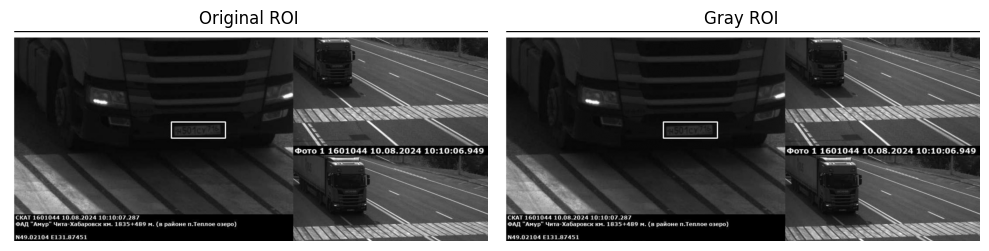

In [79]:
import pypdfium2 as pdfium
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Преобразование документа из PDF в JPEG (только второй документ)
pdf = pdfium.PdfDocument("primer3.pdf")

# Определите страницы второго документа (в примере это 2-я страница)
start_page = 1  # Индекс второй страницы
end_page = len(pdf)  # Обработать до конца, измените при необходимости

for i in range(start_page, end_page):
    page = pdf[i]
    image = page.render(scale=4).to_pil()
    image.save(f"output_{i:03d}.jpg")

# 2. Преобразование файла JPEG
# Загрузка изображения второго документа (пример для первой страницы второго документа)
img = cv2.imread("output_001.jpg")  # "output_001.jpg" — первая страница второго документа

# Выбор области интереса (ROI)
roi = img[800:1700, 150:2200]  # Указаны примерные координаты ROI

# Преобразование ROI в градации серого
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Сохранение ROI
output_path = "output_cropped_gray_roi.jpg"
cv2.imwrite(output_path, gray_roi)
print(f"Сохранен файл: {output_path}")

# Отображение ROI с помощью Matplotlib
plt.figure(figsize=(10, 5))

# Исходное изображение
plt.subplot(1, 2, 1)
plt.title("Original ROI")
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Градации серого
plt.subplot(1, 2, 2)
plt.title("Gray ROI")
plt.imshow(gray_roi, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

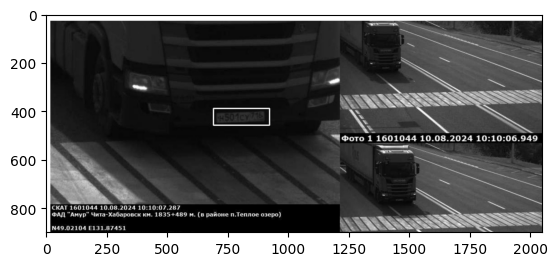

In [80]:
img = cv2.imread("output_cropped_gray_roi.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

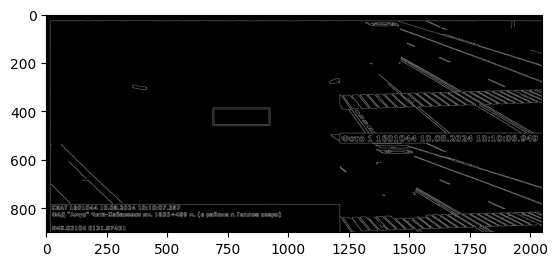

In [81]:
bfilter = cv2.bilateralFilter(gray, 15, 30, 30)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [82]:
import imutils
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [83]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [84]:
location

array([[[689, 389]],

       [[691, 461]],

       [[926, 460]],

       [[925, 387]]], dtype=int32)

In [85]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

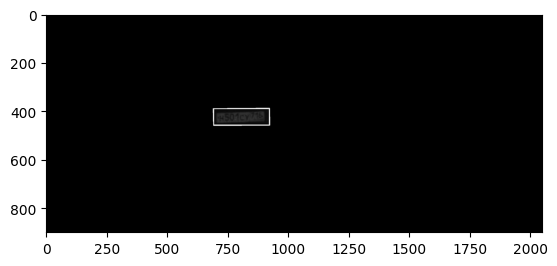

In [86]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [96]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

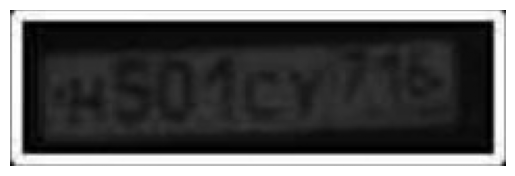

In [112]:
# Сохраняем обрезанное изображение
cv2.imwrite('cropped_image.jpg', cropped_image)

# Отображение изображения с использованием matplotlib
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')  # Отключить оси
plt.show()

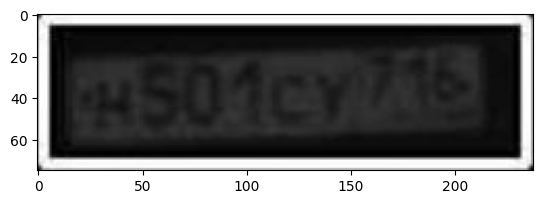

In [89]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [100]:
import easyocr
reader = easyocr.Reader(['ru', 'en'])
result = reader.readtext(cropped_image)
result

[([[np.int32(13), np.int32(13)],
   [np.int32(210), np.int32(13)],
   [np.int32(210), np.int32(66)],
   [np.int32(13), np.int32(66)]],
  '',
  np.float64(0.0))]

In [43]:
# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]

    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]

    ii = cv2.imread('contour.jpg')

    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        # detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)

        # checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            # extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))

            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

            # Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) # List that stores the character's binary image (unsorted)

    # Return characters on ascending order with respect to the x-coordinate (most-left character first)

    plt.show()
    # arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx])# stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [83]:
def segment_characters(image) :
    """
    Обрабатывает изображение номерного знака и извлекает символы.
    Изображение преобразуется в светлый формат.

    Args:
        image: Входное изображение

    Returns:
        list: Список найденных символов
    """
    # Изменение размера
    img_lp = cv2.resize(image, (333, 75))

    # Преобразование в серый цвет
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)

    # Инвертирование изображения для светлого результата
    img_inverted = cv2.bitwise_not(img_gray_lp)

    # Бинаризация с инвертированным порогом
    _, img_binary_lp = cv2.threshold(img_inverted, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Морфологические операции
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    # Получение размеров
    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Создание белых границ
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Визуализация промежуточных результатов
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(img_gray_lp, cmap='gray')
    plt.title('Исходное серое')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(img_inverted, cmap='gray')
    plt.title('Инвертированное')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Светлое бинарное')
    plt.axis('off')

    plt.show()

    # Сохранение результата
    cv2.imwrite('contour.jpg', img_binary_lp)

    # Поиск контуров
    dimensions = [LP_WIDTH/6,
                 LP_WIDTH/2,
                 LP_HEIGHT/10,
                 2*LP_HEIGHT/3]

    char_list = find_contours(dimensions, img_binary_lp)
    return char_list

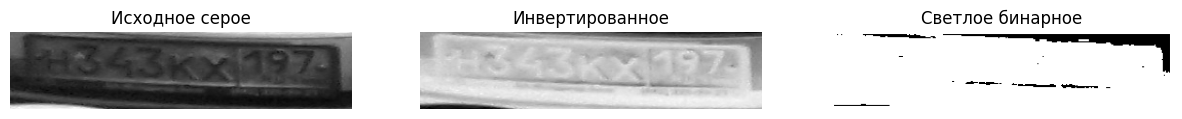

In [85]:
# Let's see the segmented characters
plate = cv2.imread('/content/172.bmp')
char = segment_characters(plate)

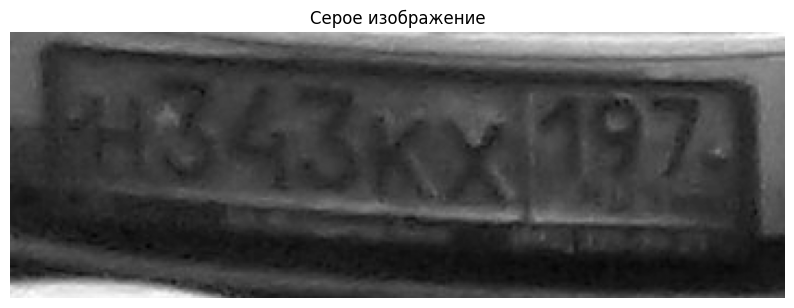

Распознанный текст:
Текст: 157, Вероятность: 0.10
Текст: ъ, Вероятность: 0.22


In [93]:
import cv2
import easyocr
import matplotlib.pyplot as plt

def segment_characters(image_path):
    """
    Обрабатывает изображение номерного знака и извлекает символы.
    Изображение преобразуется в светлый формат.

    Args:
        image_path (str): Путь к изображению номерного знака

    Returns:
        list: Список найденных символов
    """
    # Загрузка изображения
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Не удалось загрузить изображение: {image_path}")

    # Преобразование в серый цвет
    img_gray_lp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Инвертирование изображения для светлого результата
    img_inverted = cv2.bitwise_not(img_gray_lp)

    # Бинаризация с инвертированным порогом
    _, img_binary_lp = cv2.threshold(img_inverted, 50, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Морфологические операции
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    # Получение размеров
    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Создание белых границ
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Визуализация промежуточных результатов
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(img_gray_lp, cmap='gray')
    plt.title('Исходное серое')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(img_inverted, cmap='gray')
    plt.title('Инвертированное')
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(img_binary_lp, cmap='gray')
    plt.title('Светлое бинарное')
    plt.axis('off')

    plt.show()

    # Сохранение результата
    cv2.imwrite('contour.jpg', img_binary_lp)

    # Поиск контуров
    dimensions = [LP_WIDTH/6,
                 LP_WIDTH/2,
                 LP_HEIGHT/10,
                 2*LP_HEIGHT/3]

    char_list = find_contours(dimensions, img_binary_lp)
    return char_list

# Загрузка изображения
image = cv2.imread('/content/172.bmp')

# Преобразование в серый цвет
img_gray_lp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Создание reader для русского и английского языков
reader = easyocr.Reader(['ru', 'en'])

# Отображение изображения
plt.figure(figsize=(10, 4))
plt.imshow(img_gray_lp, cmap='gray')
plt.title('Серое изображение')
plt.axis('off')
plt.show()

# Распознавание текста
result = reader.readtext(img_gray_lp)

# Вывод результатов
print("Распознанный текст:")
for (bbox, text, prob) in result:
    print(f"Текст: {text}, Вероятность: {prob:.2f}")

[INFO] 0.1419: 1455
[INFO] 0.7910: T253


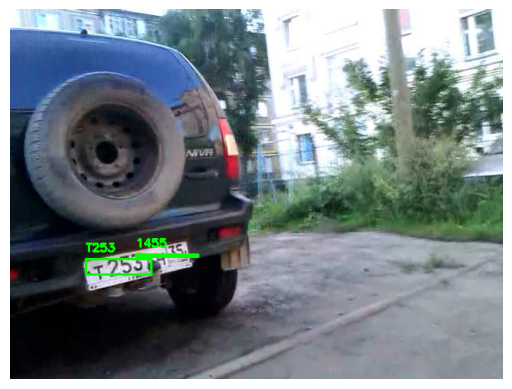

In [82]:
# Read photo again for details
image = cv2.imread('/content/1_11_2014_12_16_20_137.bmp')

# Get text with OCR (Optical Character Recognition)
reader = easyocr.Reader(['en'])
results = reader.readtext(image)

#Loop over the results
for result in results:
    bbox, text, prob = result

    #display the OCR'd text and associated probability
    print("[INFO] {:.4f}: {}".format(prob, text))

    #unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl =(int(tl[0]), int(tl[1]))
    tr =(int(tr[0]), int(tr[1]))
    br =(int(br[0]), int(br[1]))
    bl =(int(bl[0]), int(bl[1]))

    # Reduce font size
    font_scale = 0.5

    #draw the box surrounding the text along with the OCR's text itself

    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
        cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), 2)

#show the output image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()